# Mango Leaf Disease Classification

Dataset credits: https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt

In [88]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 30

In [6]:
# The following API loads dataset into tf.data.Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 8 classes.


In [7]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [8]:
len(dataset)      # 125*32 = 4000

125

(32, 224, 224, 3)
[4 5 5 7 4 4 2 6 5 1 3 7 4 0 3 1 6 5 7 4 0 1 3 2 4 5 1 6 4 6 3 6]


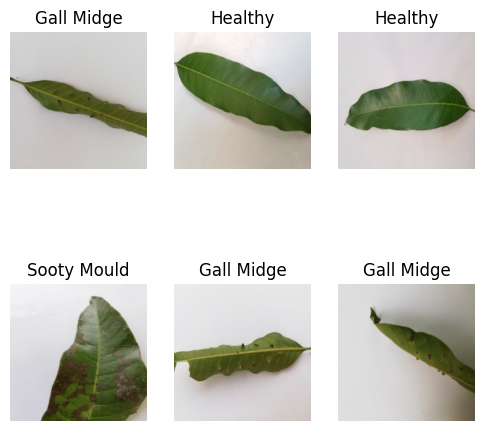

In [19]:
plt.figure(figsize=(6,6))
for img_batch, label_batch in dataset.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [29]:
def get_tf_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size=2000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=20)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_tf_dataset_partitions(dataset)

In [31]:
len(train_ds)

100

In [32]:
len(val_ds)

12

In [33]:
len(test_ds)

13

In [34]:
# cache will retain the data in the memory for use in the next epoch

train_ds = train_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = val_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

<h4> Preprocessing </h4>

In [35]:
# resize and rescale layer

resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)    
])

In [36]:
# augmentation layer

data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [89]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=8

model = models.Sequential([
    resize_and_scale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [91]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [92]:
history = model.fit(train_ds,
         epochs=EPOCH,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_ds)

Epoch 1/30


100/100 [==============================] - 506s 5s/step - loss: 1.5867 - accuracy: 0.3434 - val_loss: 1.4332 - val_accuracy: 0.4323
Epoch 2/30
100/100 [==============================] - 18s 179ms/step - loss: 0.9136 - accuracy: 0.6547 - val_loss: 0.6647 - val_accuracy: 0.7630
Epoch 3/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5085 - accuracy: 0.8091 - val_loss: 0.3841 - val_accuracy: 0.8724
Epoch 4/30
100/100 [==============================] - 16s 164ms/step - loss: 0.3828 - accuracy: 0.8669 - val_loss: 0.2637 - val_accuracy: 0.9193
Epoch 5/30
100/100 [==============================] - 16s 165ms/step - loss: 0.3075 - accuracy: 0.8947 - val_loss: 0.4501 - val_accuracy: 0.8047
Epoch 6/30
100/100 [==============================] - 16s 164ms/step - loss: 0.2739 - accuracy: 0.9050 - val_loss: 0.2941 - val_accuracy: 0.9036
Epoch 7/30
100/100 [==============================] - 16s 164ms/step - loss: 0.2176 - accuracy: 0.9259 - val_loss: 0.2407 - val_accuracy: 0.919

In [93]:
model.evaluate(test_ds)

13/13 [==============================] - 1s 85ms/step - loss: 0.0384 - accuracy: 0.9904


[0.03836124762892723, 0.9903846383094788]

In [95]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 100}

In [96]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [97]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

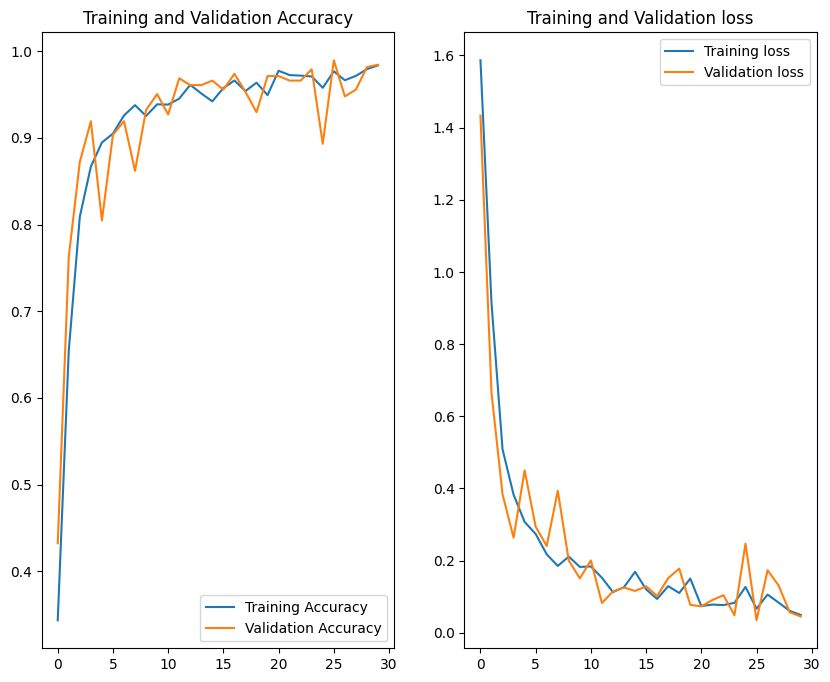

In [98]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCH), loss, label='Training loss')
plt.plot(range(EPOCH), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

First image to predict
First image's label: Healthy
1/1 [==============================] - 0s 116ms/step
Predicted Label: Healthy


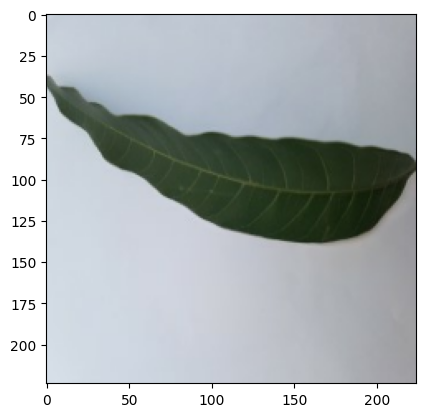

In [99]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    print("First image's label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [100]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    pred_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return pred_class, confidence

1/1 [==============================] - 0s 31ms/step


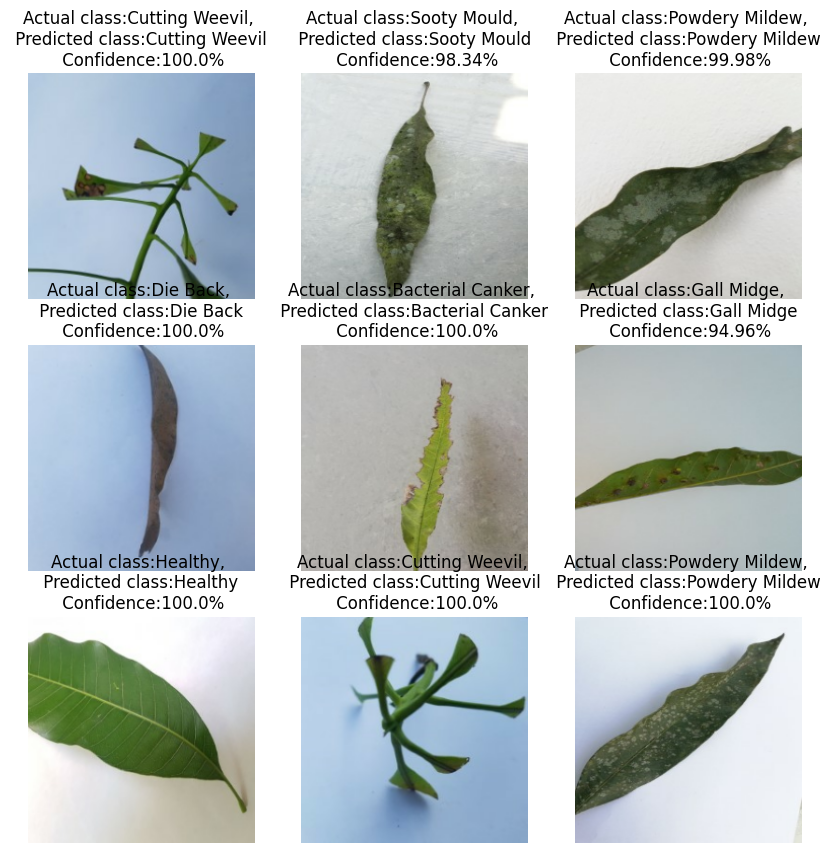

In [101]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]
        
        plt.title(f"Actual class:{actual_class}, \n Predicted class:{predicted_class} \n Confidence:{confidence}%")
        
        plt.axis('off')

In [103]:
import os
model_version = max([int(i) for i in os.listdir('../saved_models') + [0]]) + 1
model.save(f'../saved_models/{model_version}')

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets
